In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_rows', 1000)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('customer_booking.csv',encoding="ISO-8859-1")

In [3]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
data.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [5]:
data.shape

(50000, 14)

In [6]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [8]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


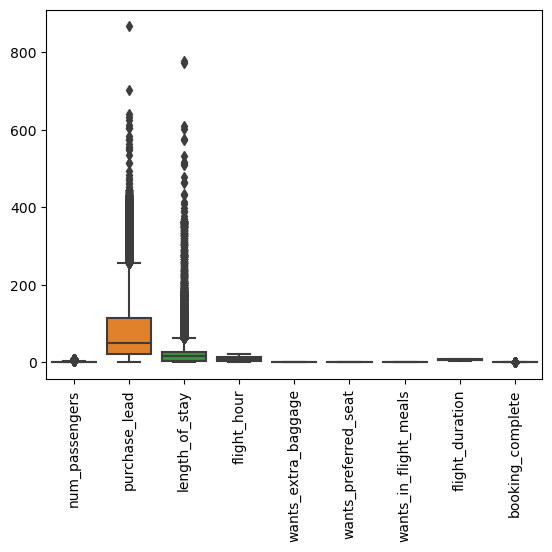

In [9]:
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

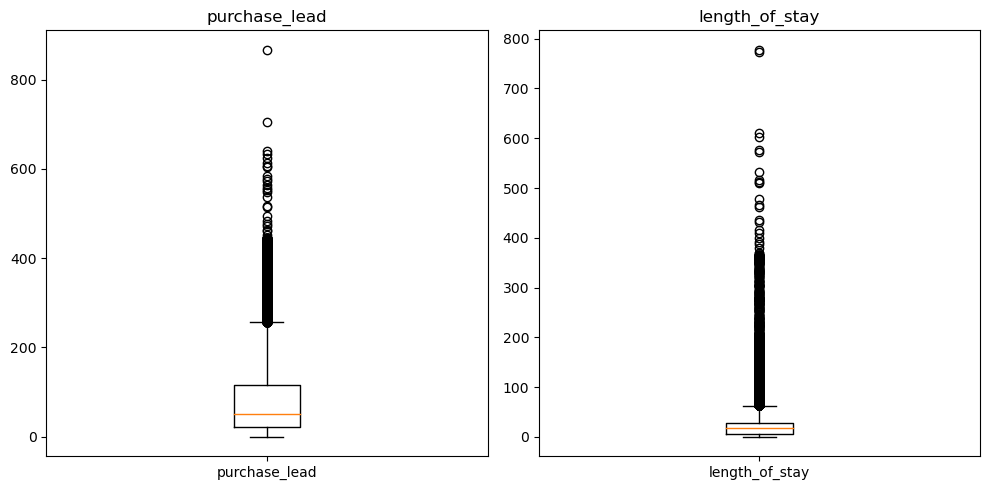

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the boxplot for purchase_lead variable
axs[0].boxplot(data['purchase_lead'])
axs[0].set_xticklabels(['purchase_lead'])
axs[0].set_title('purchase_lead')

# Plot the boxplot for length_of_stay variable
axs[1].boxplot(data['length_of_stay'])
axs[1].set_xticklabels(['length_of_stay'])
axs[1].set_title('length_of_stay')

plt.tight_layout()
plt.show()

In [11]:
max_thresh = data['purchase_lead'].quantile(0.95)
max_thresh

287.0

In [12]:
min_thresh = data['purchase_lead'].quantile(0.5)
min_thresh

51.0

In [13]:
data[data.purchase_lead > 287]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0
19,1,Internet,RoundTrip,351,17,3,Sun,AKLHGH,China,0,0,0,5.07,0
42,2,Internet,RoundTrip,346,23,8,Mon,AKLICN,South Korea,1,0,1,6.62,0
63,4,Internet,RoundTrip,311,27,6,Sat,AKLICN,New Zealand,0,1,0,6.62,0
65,2,Internet,RoundTrip,314,43,10,Sun,AKLICN,New Zealand,0,0,0,6.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49916,2,Internet,RoundTrip,380,6,6,Sun,PENTPE,Malaysia,1,0,0,4.67,0
49953,8,Internet,RoundTrip,328,6,17,Sat,PENTPE,Malaysia,1,1,1,4.67,1
49955,2,Internet,RoundTrip,366,6,2,Tue,PENTPE,Malaysia,1,0,0,4.67,1
49973,2,Internet,RoundTrip,333,6,6,Thu,PENTPE,Malaysia,1,0,1,4.67,0


In [14]:
data = data[data['purchase_lead'] < max_thresh]

In [15]:
data.shape

(47478, 14)

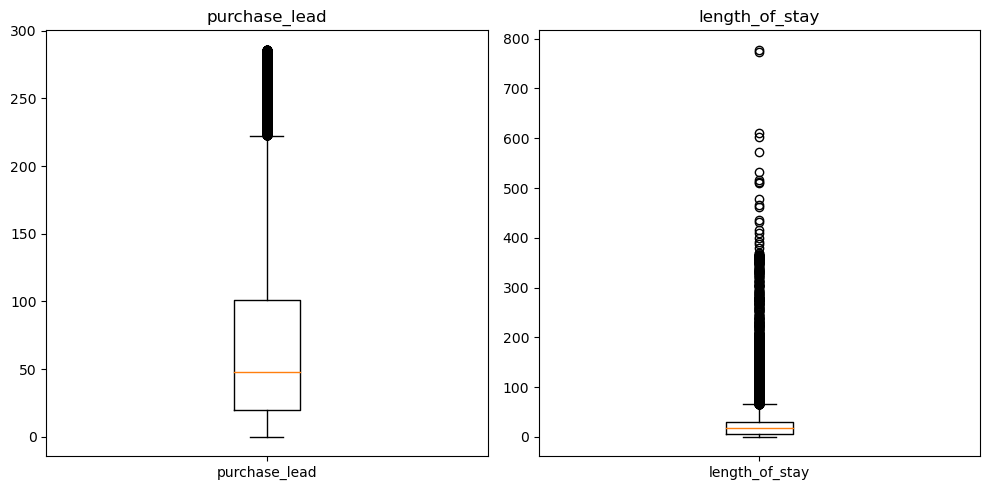

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the boxplot for purchase_lead variable
axs[0].boxplot(data['purchase_lead'])
axs[0].set_xticklabels(['purchase_lead'])
axs[0].set_title('purchase_lead')

# Plot the boxplot for length_of_stay variable
axs[1].boxplot(data['length_of_stay'])
axs[1].set_xticklabels(['length_of_stay'])
axs[1].set_title('length_of_stay')

plt.tight_layout()
plt.show()

In [17]:
max_thresh = data.length_of_stay.quantile(0.95)

In [18]:
min_thresh = data.length_of_stay.quantile(0.5)

In [19]:
max_thresh, min_thresh

(85.0, 17.0)

In [20]:
data[data['length_of_stay'] > max_thresh]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
18,1,Internet,RoundTrip,67,155,8,Sun,AKLDEL,New Zealand,1,0,0,5.52,0
21,1,Internet,RoundTrip,21,88,9,Wed,AKLICN,South Korea,1,0,1,6.62,0
41,1,Internet,RoundTrip,71,90,7,Thu,AKLICN,South Korea,1,1,1,6.62,0
50,1,Internet,RoundTrip,77,96,9,Tue,AKLICN,New Zealand,1,0,1,6.62,0
54,1,Internet,RoundTrip,22,89,14,Tue,AKLICN,South Korea,1,0,1,6.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25522,2,Internet,RoundTrip,78,94,11,Wed,SYDTRZ,Australia,1,0,0,8.58,0
25530,1,Internet,RoundTrip,12,153,11,Wed,SYDTRZ,Australia,1,1,1,8.58,0
25536,1,Internet,RoundTrip,14,91,2,Thu,SYDTWU,Australia,1,0,1,8.58,0
25551,1,Internet,RoundTrip,19,89,14,Sat,TPETRZ,Taiwan,1,0,1,4.67,0


In [21]:
data = data[data['length_of_stay'] < max_thresh]

In [22]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


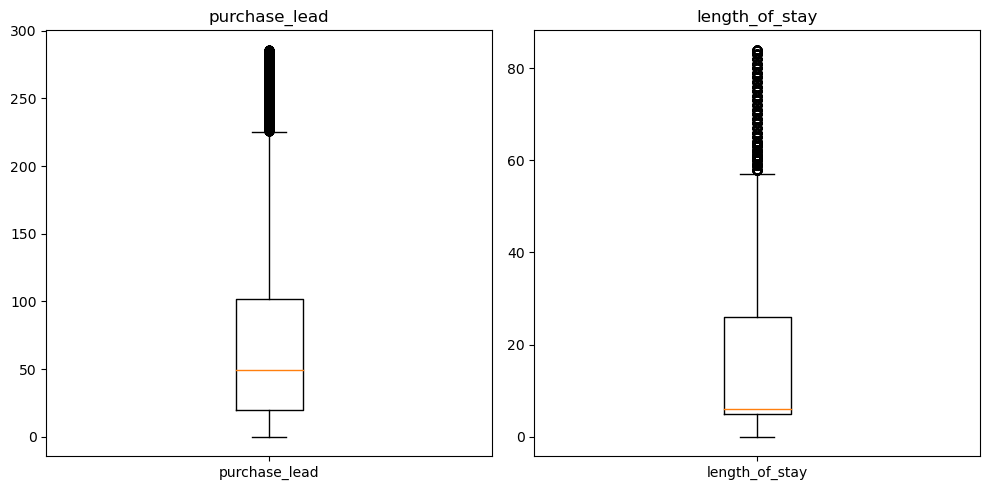

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the boxplot for purchase_lead variable
axs[0].boxplot(data['purchase_lead'])
axs[0].set_xticklabels(['purchase_lead'])
axs[0].set_title('purchase_lead')

# Plot the boxplot for length_of_stay variable
axs[1].boxplot(data['length_of_stay'])
axs[1].set_xticklabels(['length_of_stay'])
axs[1].set_title('length_of_stay')

plt.tight_layout()
plt.show()

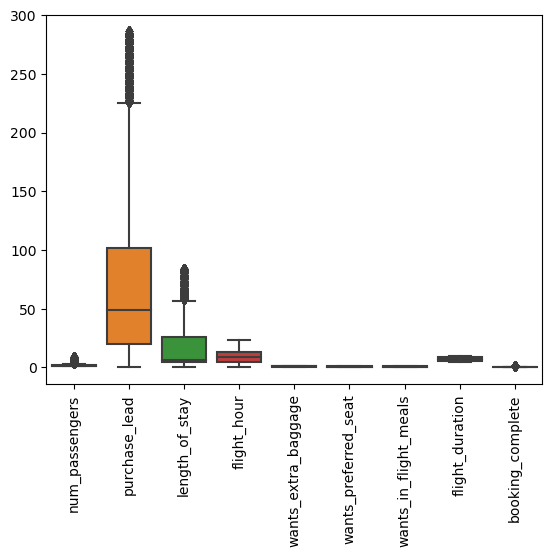

In [24]:
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [25]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,45053.000000,45053.000000,45053.000000,45053.000000,45053.000000,45053.000000,45053.000000,45053.000000,45053.000000
mean,1.581559,71.942645,17.618205,9.061994,0.663019,0.296140,0.424345,7.243892,0.150778
std,1.013707,68.224908,16.982765,5.382596,0.472684,0.456559,0.494249,1.501771,0.357836
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,20.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,49.000000,6.000000,9.000000,1.000000,0.000000,0.000000,7.420000,0.000000
75%,2.000000,102.000000,26.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,286.000000,84.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [26]:
i = np.random.randint(1,6)
data.sample(i)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
37023,1,Internet,RoundTrip,61,5,6,Thu,DMKMEL,Australia,0,0,1,8.83,0
17010,1,Internet,RoundTrip,6,1,8,Sun,KNOSYD,Indonesia,1,0,1,8.58,0
13233,1,Internet,RoundTrip,153,68,11,Sun,HYDPER,Australia,0,0,0,5.62,0


In [27]:
data.num_passengers.value_counts().sort_values(ascending=False)

1    28495
2    11374
3     2647
4     1553
5      487
6      258
7       98
8       80
9       61
Name: num_passengers, dtype: int64

In [28]:
data.sales_channel.value_counts().sort_values(ascending=False)

Internet    39868
Mobile       5185
Name: sales_channel, dtype: int64

In [29]:
data.trip_type.value_counts().sort_values(ascending=False)

RoundTrip     44595
OneWay          356
CircleTrip      102
Name: trip_type, dtype: int64

In [30]:
data['flight_day'].value_counts().sort_values(ascending=False)

Mon    7142
Wed    7029
Tue    6939
Thu    6808
Fri    6239
Sun    5657
Sat    5239
Name: flight_day, dtype: int64

In [31]:
data['booking_origin'].value_counts().sort_values(ascending=False)

Australia               16320
Malaysia                 6212
South Korea              4190
Japan                    3596
China                    3220
Taiwan                   1941
Indonesia                1933
Thailand                 1706
India                    1110
Singapore                 997
New Zealand               888
United States             423
Vietnam                   325
Macau                     296
Hong Kong                 252
Philippines               217
United Kingdom            161
Brunei                    155
Cambodia                  121
(not set)                  81
Sri Lanka                  64
Canada                     55
France                     53
Italy                      53
Germany                    51
Netherlands                44
Myanmar (Burma)            44
Mauritius                  41
United Arab Emirates       38
Nepal                      37
Bangladesh                 31
Saudi Arabia               31
Russia                     30
Spain     

In [32]:
data.head(1)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0


In [33]:
data = data[data['booking_origin'] != 'not set']

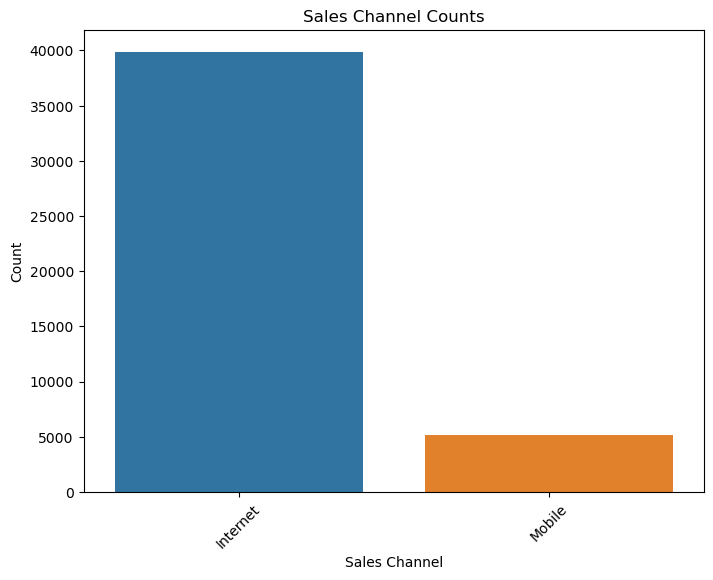

In [34]:
sales_channel_counts = data['sales_channel'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_channel_counts.index, y=sales_channel_counts.values)
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Sales Channel Counts')
plt.xticks(rotation=45)
plt.show()

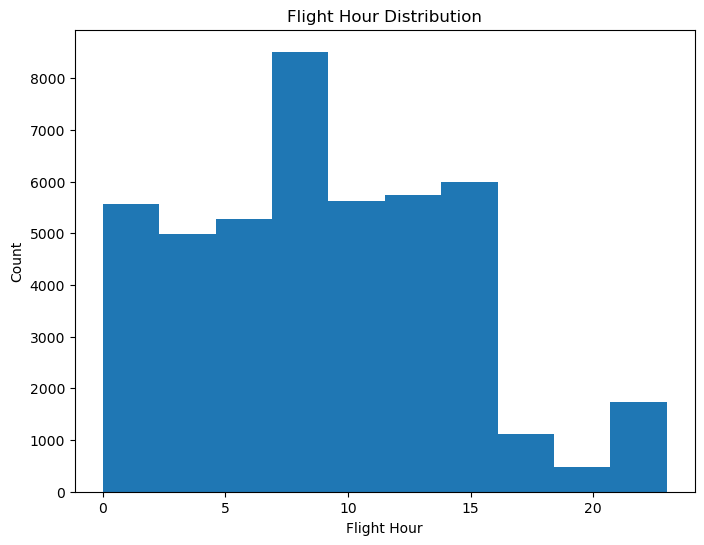

In [35]:
plt.figure(figsize=(8, 6))
plt.hist(data['flight_hour'], bins=10)
plt.xlabel('Flight Hour')
plt.ylabel('Count')
plt.title('Flight Hour Distribution')
plt.show()

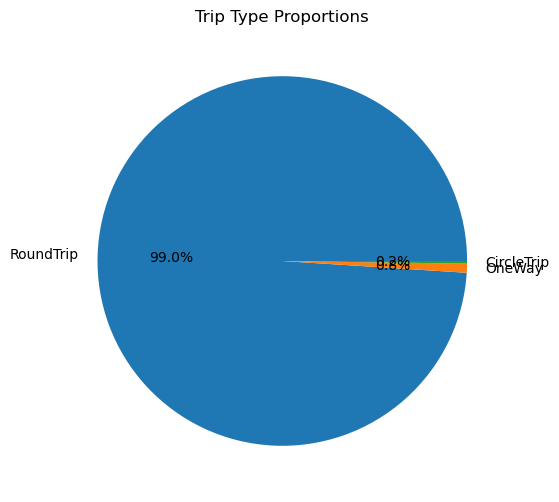

In [36]:
trip_type_counts = data['trip_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(trip_type_counts.values, labels=trip_type_counts.index, autopct='%1.1f%%')
plt.title('Trip Type Proportions')
plt.show()

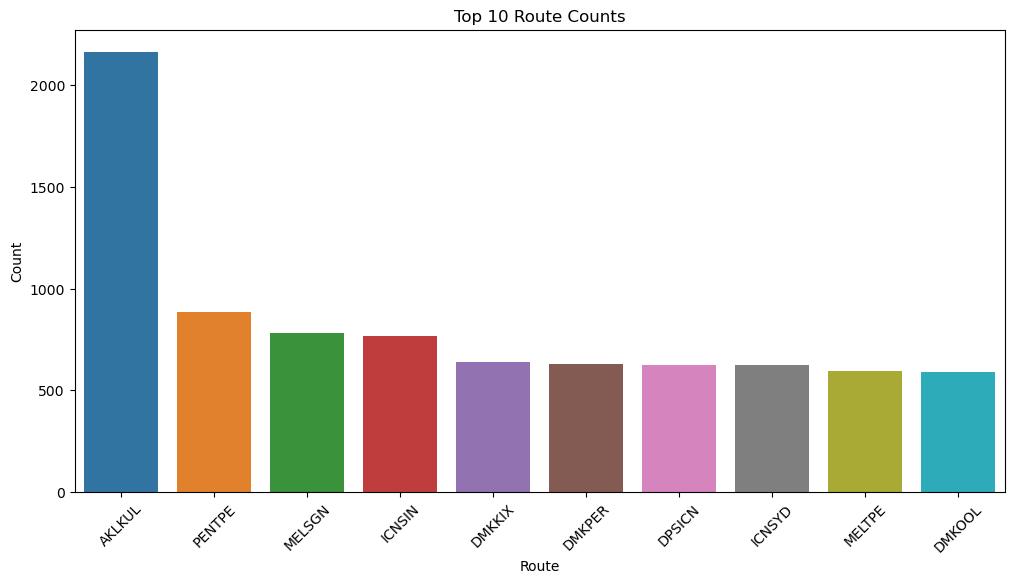

In [37]:
plt.figure(figsize=(12, 6))
route_counts = data['route'].value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=route_counts.index, y=route_counts.values)
plt.xlabel('Route')
plt.ylabel('Count')
plt.title('Top 10 Route Counts')
plt.xticks(rotation=45)
plt.show()

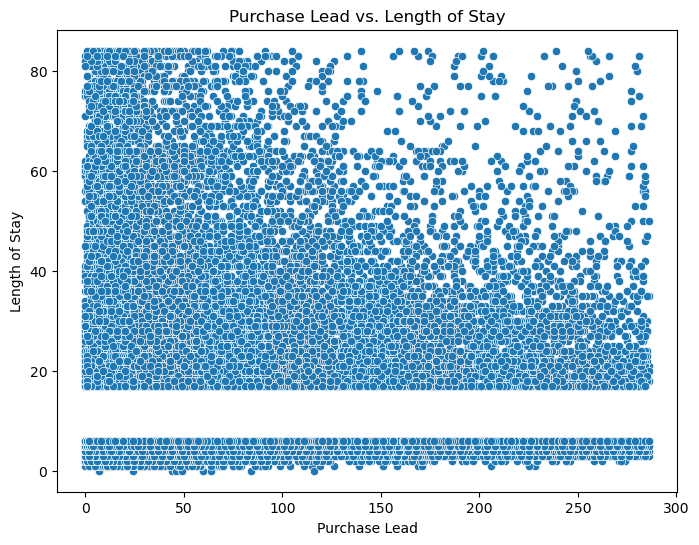

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='purchase_lead', y='length_of_stay')
plt.xlabel('Purchase Lead')
plt.ylabel('Length of Stay')
plt.title('Purchase Lead vs. Length of Stay')
plt.show()

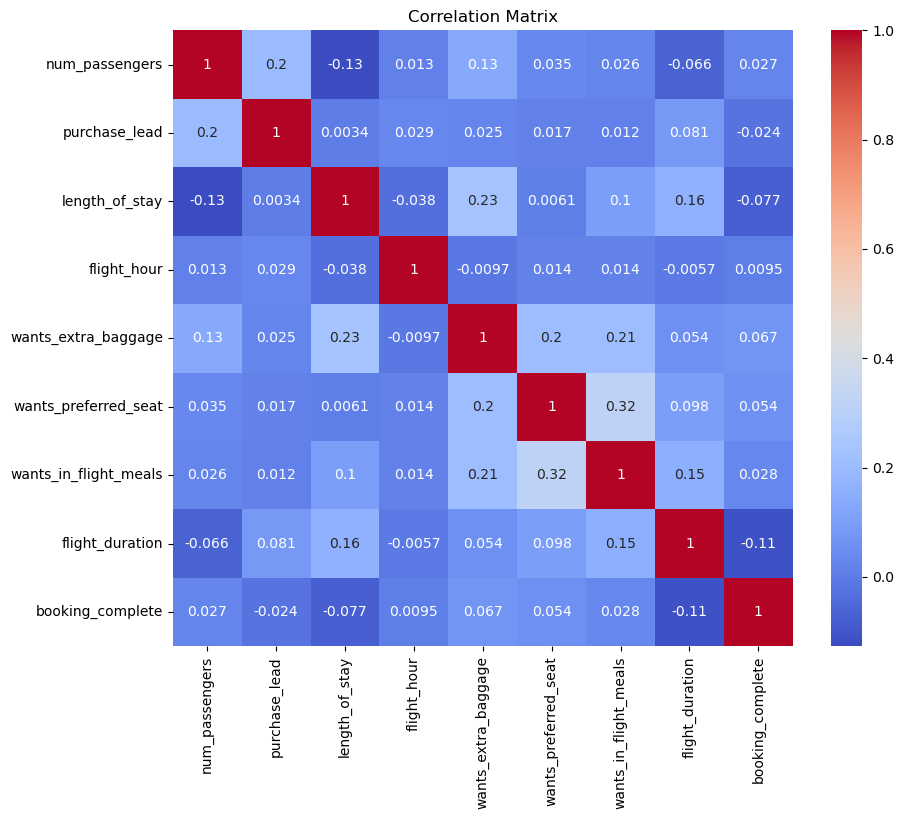

In [39]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [40]:
correlation = data[['booking_origin', 'booking_complete']].corr()
print(correlation)

                  booking_complete
booking_complete               1.0


In [41]:
correlation = data[['route', 'booking_complete']].corr()
print(correlation)

                  booking_complete
booking_complete               1.0


In [42]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [43]:
data.drop(['route','booking_origin'],axis=1,inplace=True)

In [44]:
data = pd.get_dummies(data, columns=['sales_channel', 'trip_type', 'flight_day'])
data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,262,19,7,1,0,0,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,112,20,3,0,0,0,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
2,2,243,22,17,1,1,0,5.52,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,96,31,4,0,0,1,5.52,0,1,...,0,0,1,0,0,1,0,0,0,0
4,2,68,22,15,1,0,1,5.52,0,1,...,0,0,1,0,0,0,0,0,0,1


In [45]:
X = data.loc[:,data.columns!='booking_complete']
y = data.booking_complete

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [47]:
features = ['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_duration']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[features] = sc.fit_transform(X_train[features])
X_test[features] = sc.transform(X_test[features])

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix , accuracy_score
accuracy_score(y_test,y_pred_test)

0.8499611585839529

In [51]:
accuracy_score(y_train,y_pred_train)

0.8490372343377172

In [52]:
coefficients = logreg.coef_[0]

# Corresponding variable names (X column names) in the same order as the coefficients
variable_names = X_train.columns

# Create a dataframe with coefficients and variable names
coef_df = pd.DataFrame(list(zip(variable_names, coefficients)), columns=["Feature", "Coefficient"])

print(coef_df)

                   Feature  Coefficient
0           num_passengers    -0.001694
1            purchase_lead    -0.060681
2           length_of_stay    -0.280881
3              flight_hour     0.020613
4      wants_extra_baggage     0.504907
5     wants_preferred_seat     0.266416
6    wants_in_flight_meals     0.145208
7          flight_duration    -0.304687
8   sales_channel_Internet     0.231914
9     sales_channel_Mobile    -0.235807
10    trip_type_CircleTrip    -0.486878
11        trip_type_OneWay    -0.313552
12     trip_type_RoundTrip     0.796537
13          flight_day_Fri    -0.033789
14          flight_day_Mon    -0.027653
15          flight_day_Sat     0.018834
16          flight_day_Sun    -0.054550
17          flight_day_Thu     0.009393
18          flight_day_Tue    -0.008318
19          flight_day_Wed     0.092189


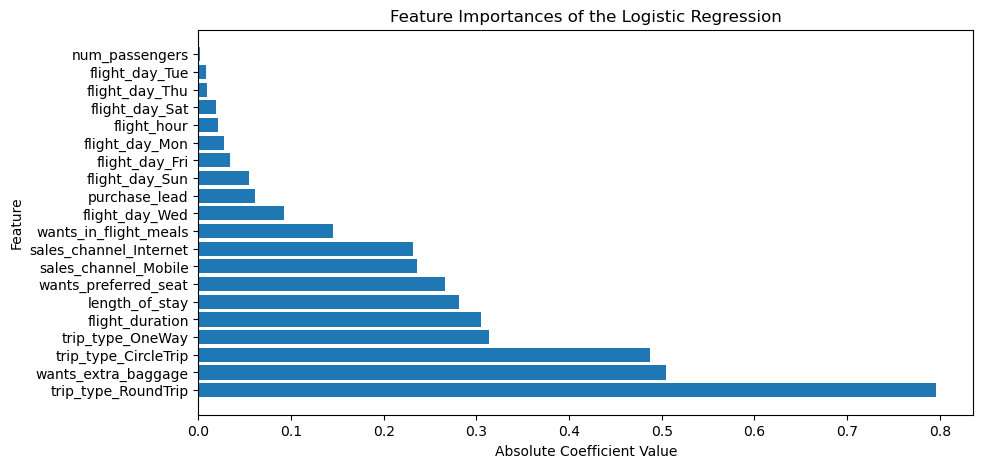

In [53]:
# Get the coefficients of the logistic regression model
coefficients = logreg.coef_[0]

# Get feature names
feature_names = X.columns

# Create a dataframe with feature importances and feature names
feature_importance = pd.DataFrame(list(zip(feature_names, abs(coefficients))), columns=["Feature", "Importance"])

# Sort the dataframe by feature importances
feature_importance.sort_values(by=['Importance'], ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importances of the Logistic Regression")
plt.show()


In [54]:
import statsmodels.api as sm

In [55]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=10, step=1) # we can do 20 variable output initially
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False])

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('num_passengers', False, 11),
 ('purchase_lead', False, 3),
 ('length_of_stay', True, 1),
 ('flight_hour', False, 7),
 ('wants_extra_baggage', True, 1),
 ('wants_preferred_seat', True, 1),
 ('wants_in_flight_meals', True, 1),
 ('flight_duration', True, 1),
 ('sales_channel_Internet', True, 1),
 ('sales_channel_Mobile', True, 1),
 ('trip_type_CircleTrip', True, 1),
 ('trip_type_OneWay', True, 1),
 ('trip_type_RoundTrip', True, 1),
 ('flight_day_Fri', False, 5),
 ('flight_day_Mon', False, 6),
 ('flight_day_Sat', False, 8),
 ('flight_day_Sun', False, 4),
 ('flight_day_Thu', False, 9),
 ('flight_day_Tue', False, 10),
 ('flight_day_Wed', False, 2)]

In [57]:
cols = X_train.columns[rfe.support_]
cols

Index(['length_of_stay', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'sales_channel_Internet',
       'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay',
       'trip_type_RoundTrip'],
      dtype='object')

In [58]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       booking_complete   No. Observations:                36042
Model:                            GLM   Df Residuals:                    36033
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14726.
Date:                Wed, 19 Jul 2023   Deviance:                       29452.
Time:                        12:55:07   Pearson chi2:                 3.65e+04
No. Iterations:                    14   Pseudo R-squ. (CS):            0.03109
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.8108      0.120    -15.106      0.000      -2.046      -1.576
length_of_stay            -0.2804      0.018    -15.770      0.000      -0.315      -0.246
wants_extra_baggage        0.5005      0.035     14.170      0.000       0.431       0.570
wants_preferred_seat       0.2671      0.034      7.878      0.000       0.201       0.334
wants_in_flight_meals      0.1457      0.032      4.490      0.000       0.082       0.209
flight_duration           -0.3098      0.015    -20.271      0.000      -0.340      -0.280
sales_channel_Internet    -0.6708      0.063    -10.677      0.000      -0.794      -0.548
sales_channel_Mobile      -1.1399      0.068    -16.796      0.000      -1.273      -1.007
trip_type_CircleTrip      -1.1959      0.437     -2.737      0.006      -2.052      -0.340
trip_type_OneWay          -0.8706      0.253     -3.447      0.001      -1.366      -0.376
trip_type_RoundTrip        0.2558      0.178      1.440      0.150      -0.092       0.604
==========================================================================================
"""

In [59]:
col1 = cols.drop('trip_type_RoundTrip')

In [60]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       booking_complete   No. Observations:                36042
Model:                            GLM   Df Residuals:                    36033
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14726.
Date:                Wed, 19 Jul 2023   Deviance:                       29452.
Time:                        12:55:08   Pearson chi2:                 3.65e+04
No. Iterations:                    20   Pseudo R-squ. (CS):            0.03109
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6402      0.026    -64.101      0.000      -1.690      -1.590
length_of_stay            -0.2804      0.018    -15.770      0.000      -0.315      -0.246
wants_extra_baggage        0.5005      0.035     14.170      0.000       0.431       0.570
wants_preferred_seat       0.2671      0.034      7.878      0.000       0.201       0.334
wants_in_flight_meals      0.1457      0.032      4.490      0.000       0.082       0.209
flight_duration           -0.3098      0.015    -20.271      0.000      -0.340      -0.280
sales_channel_Internet    -0.5856      0.022    -26.868      0.000      -0.628      -0.543
sales_channel_Mobile      -1.0547      0.035    -30.172      0.000      -1.123      -0.986
trip_type_CircleTrip      -1.4517      0.592     -2.451      0.014      -2.613      -0.291
trip_type_OneWay          -1.1263      0.267     -4.214      0.000      -1.650      -0.603
==========================================================================================
"""

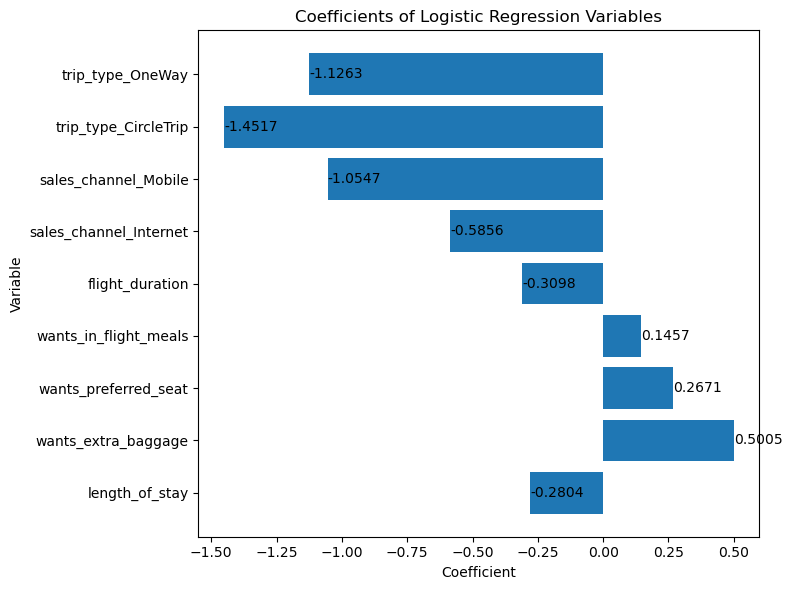

In [61]:
variables = ['length_of_stay', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
             'flight_duration', 'sales_channel_Internet', 'sales_channel_Mobile', 'trip_type_CircleTrip',
             'trip_type_OneWay']
coefficients = [-0.2804, 0.5005, 0.2671, 0.1457, -0.3098, -0.5856, -1.0547, -1.4517, -1.1263]
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(variables, coefficients)
ax.set_xlabel('Coefficient')
ax.set_ylabel('Variable')
ax.set_title('Coefficients of Logistic Regression Variables')
for i, v in enumerate(coefficients):
    ax.text(v, i, str(round(v, 4)), va='center')
plt.tight_layout()
plt.show()

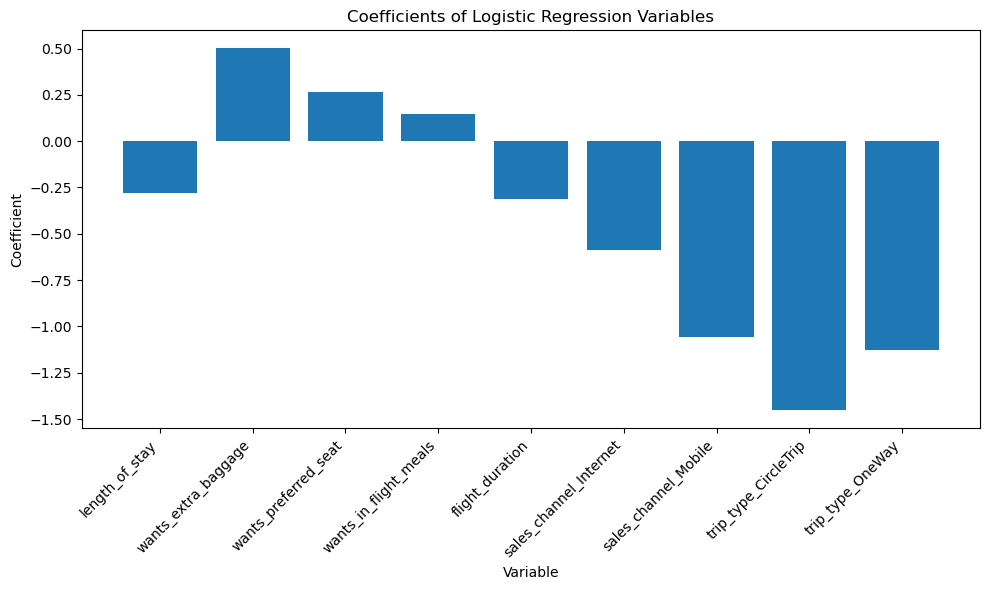

In [62]:
variables = ['length_of_stay', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
             'flight_duration', 'sales_channel_Internet', 'sales_channel_Mobile', 'trip_type_CircleTrip',
             'trip_type_OneWay']
coefficients = [-0.2804, 0.5005, 0.2671, 0.1457, -0.3098, -0.5856, -1.0547, -1.4517, -1.1263]
plt.figure(figsize=(10, 6))
plt.bar(variables, coefficients)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.title('Coefficients of Logistic Regression Variables')
plt.tight_layout()
plt.show()

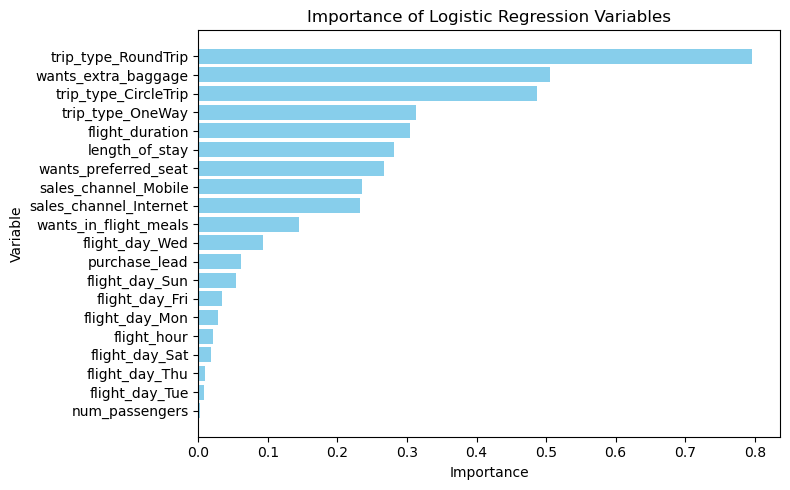

In [63]:
plt.figure(figsize=(8,5))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance of Logistic Regression Variables')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

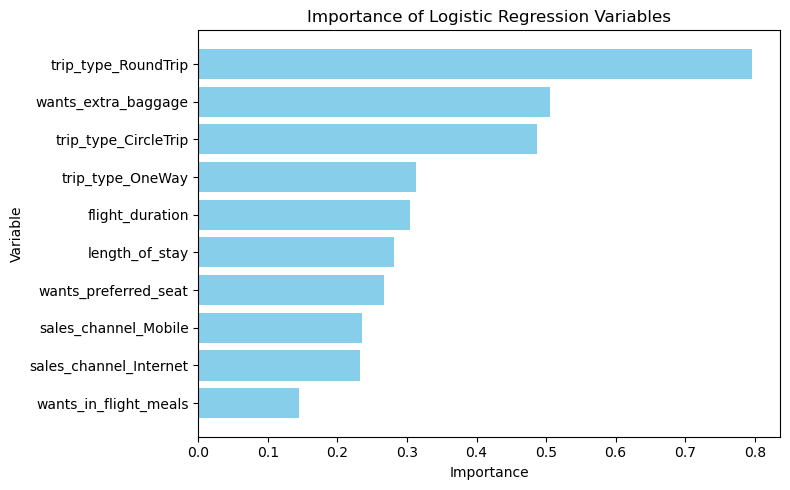

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the variables of interest
variables = ['length_of_stay', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
             'flight_duration', 'sales_channel_Internet', 'sales_channel_Mobile',
             'trip_type_CircleTrip', 'trip_type_OneWay','trip_type_RoundTrip']

# Create a new DataFrame with only the selected variables and their importances
selected_features = feature_importance[feature_importance["Feature"].isin(variables)]

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.barh(selected_features["Feature"], selected_features["Importance"], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance of Logistic Regression Variables')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.tight_layout()
plt.show()
